<a id='top'></a>

# CSCI3022 S22



# Homework 1: Measures of Centrality and Dispersion, Slicing Data

## Due Friday, January 28 at 11:59 pm to Canvas and Gradescope
***

**Name**: Matthew Su
***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline



## (5 pts) Problem 1: Sampling
***

Suppose we wish to create a data set where CU polls current undergraduate students regarding their satisfaction with the decision to start the Spring 2022 semester the week before MLK day as a fully-remote start.

The Registrar's office contains a list of all currently enrolled students.  They provide this list, with e-mail addresses, to the office of Data Analytics, who consider the following 3 ways to poll:

- A) Send an e-mail to each and every current CU student on the list
- B) For each department at CU, randomly choose 10% of their declared majors and send them an e-mail
- C) Sort the list by the students' Student ID numbers, then send e-mails to exactly 10% of the list by sending it to the 4th, 14th, 24th, 34th, etc. students in the order of the sorted list.

What kinds of samples are *A, B*, and *C*?  Use the definitions from class.  Provide a 1-setence justification or definition for each type as part of your answer.

A. When you send an email to each and every CU student on the list, you are generating a Census Sample as it incompasses everything in the population.

B. By sorting based on department and randomlly selecting based on declared major, this is taking a Stratified Sample.

C. By ordering and choosing based on some kth unit, you are generating a Systematic Sample


## (20 pts) Problem 2: Computation (Streaming Means)
***

Data science is often divided into two categories: questions of *what* the best value might be to repreesnt a data problem, and questions of *how* to compute that data value.  Question 1 - and prior lectures - should tell you that computing the mean is valuable!  But *how* do we compute the mean?

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 
<a id='eq1'></a>
$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2 \qquad \tag{Equation 1}
$$

**Part A**:

How many computations - floating point operations: addition, subtraction, multiplication, division each count as 1 operation - are required to compute the mean of the data set with $n$ observations?


(n-1)+1 || n computations, as you are counting the summation actions of addition as "n" minus one operation plus the additional division post summation


**Part B**:

Now suppose our data is *streaming*- we slowly add observations one at a time, instead of seeing the entire data set at once.  We are still interested in the mean, so if we stream the data set `[4,6,0,10, ...]`, we first compute the mean of the the first data point `[4]`, then we recompute the mean of the first two points `[4,6]`, then we recompute the mean of three `[4,6,0]`, and so forth.

Suppose we recompute the mean from scratch after each and every one of our $n$ observations are one-by-one added to our data set.  How many floating point operations are spent computing (and re-computing) the mean of the data set?

2n-2 Computations, as the only thing that changes is that the number of division operations occurs n amount of time.  

We should be convinced that streaming a mean costs a lot more computer time than just computing once!

In this problem we explore a smarter method for such an _online_ computation of the mean.  

**Result**: The following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$


A proof of this result is in the [Appendix](#Appendix) after this problem, and requires some careful manipulations of the sum $\bar{x}_n$.  Your task will be to computationally verify and utilize this result.

**Part C**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class ([Equation 1](#eq1)). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class ([Equation 1](#eq1)). You may **not** use any built-in sample mean or variance functions.

In [2]:
def my_sample_mean(nparray):
    return sum(nparray)/len(nparray)
def my_sample_var(nparray):
    dev = [(i-my_sample_mean(nparray))**2 for i in nparray]
    return sum(dev)/(len(nparray)-1)
    

**Part D**: Use your functions from Part C to compute the sample mean and sample variance of the following array, which contains the minutes late that the BuffBus is running on Friday afternoon.

`bus = [4, 10, 0, 312, 22, 39, 81, 19, 8, 60, 1,3,80, 42,12,1]`

In [3]:
bus = [4, 10, 0, 312, 22, 39, 81, 19, 8, 60, 1,3,80, 42,12,1]
mean = my_sample_mean(bus)
var = my_sample_var(bus)
print("Sample mean is: ", mean,"; sample variance is: ", var)

Sample mean is:  43.375 ; sample variance is:  5884.516666666666


**Part E**: Implement a third function called `update_mean` that implements the formula discussed as the **Result**  after part B. Note that this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$, and returns $\bar{x}_{n}$. A function header and return statement are provided for you. This function may be auto-graded, so please do not change the given header API - the order of inputs matters! If you change it, you might lose points.

Use this function to compute the values that you get from taking the mean of the first buff buses' lateness, the first two buff buses' lateness, the first three buff buses' lateness, and so on up to all of the `bus` data points from **Part D**. Store your streaming bus means in a numpy array called `buffbus_bad_means`.  Report all 16 estimates in `buffbus_bad_means`.

In [4]:
# Given API:
def update_mean(prev_mean, xn, n):
    new_mean = ((prev_mean*(n-1))+xn)/n
    return new_mean


To ensure your function complies with the given API, run this small test, where we suppose we have a mean of $\bar{x}_n = 1$ with the first $2$ data points (`prev_mean`), and we update this with the 3rd ($n=3$) data point which is $x_3=2$:

In [5]:
assert update_mean(1,2,3)==4/3, "Warning: function seems broken."

**Part F**:

How many floating point operations were spent computing the final result in your code in part E?  Is this truly better than the uninformed approach from part B?

Counting operations, only 3 (*,+,/). It was an imporvement over part B with this python implementation.

**Part G:**
A similar result to the formula preceding part C holds for variance.  In particular, we can write that:

$$
\displaystyle s^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n-1} = \frac{1}{n(n-1)} \left(n \cdot \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i \right)^2 \right)
$$

Describe in **words** and/or **psuedocode** how you might adapt the function you made in part **E** to perform running calculations of both variance and mean.  Be very clear as to what the input/instantiation arguments would be as well as what the output arguments would be in addition to any intermediate calculations.

Generally I would probably pass inputs of n and xi and utilize a helper function to generate values for the summation portions of the equation. Then the arthmatic parts can be calculated seperated for easy of troubleshooting and formatted to fit the pemdas operation order of the equation pushing out a varaince response.  

<a id='Appendix'></a>

## Appendix 

*Goal*: Prove that 
$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Note that you can get an expression for $\bar{x}_{n-1}$ by simply replacing $n$ in Equation 1 above with $n-1$.

We'll start with $\bar{x}_n$ and massage it until we get the righthand side of the formula

\begin{eqnarray}
\nonumber \bar{x}_n &=& \frac{1}{n} \sum_{k=1}^n x_k \\
&=& \frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n-1}\frac{1}{n} \sum_{k=1}^{n-1} x_k + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \left(\frac{1}{n-1} \sum_{k=1}^{n-1} x_k\right) + \frac{1}{n}x_n \\
&=& \frac{n-1}{n} \bar{x}_{n-1} + \frac{1}{n}x_n \\
&=& \frac{n}{n}\bar{x}_{n-1} - \frac{1}{n}\bar{x}_{n-1} + \frac{1}{n}x_n \\
&=&  \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \checkmark
\end{eqnarray}



[Back to top](#top)
<a id='p3'></a>

## (20 pts) Problem 3: Practice (Titanic)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [6]:
filepath = '../data/titanic_data.csv'
df = pd.read_csv(filepath)
print(df.shape)
df.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the proportion that survived.

$$P(Survived=1)$$

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# totsuv = df.loc[df["Survived"] == 1, "Survived"].sum()
survived = (df.loc[:,"Survived"]==1).sum()
totsuv = len(df)
print("Total survived: ", survived)
print ("Survival rate: {:.3f}".format(survived/totsuv))

Total survived:  350
Survival rate: 0.393


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

Generally, if the class welfare behaviour existed, we would expect to see a large proportion of class 1 survive out of their population, making up the largest proportion of survivors out of the total number of passengers. In general we would notice that the class 3 passengers would sustain the lowest survival rate followed by class 2 and finally class 1.

If male chivalry occured instead, the male survival rate would be closer to or near zero reflecting a boosted (but not 100%) survival rate for higher to middle class women.  

**Part C**: Use Pandas methods (such as `drop`) to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [9]:
dfCTitanic = df.dropna(subset=["Survived", "Pclass", "Age", "Sex"])
dfCTitanic.head()

# Taken from n3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part D**: Compute the probability of survival of both men and women.  Then, compute the probability of survival of passengers in each of the 3 passenger classes.  Finally, compute the probabilities of survival and men and women *within* each passenger class (all 6 subsets).  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [10]:
# Generating male/female survival rate

for sex in ["male","female"]:
    survived = dfCTitanic.loc[(dfCTitanic["Sex"] == sex), "Survived"].sum()
#     totsuv = len(dfCTitanic.loc[dfCTitanic["Sex"] == sex])
    totsuv = (dfCTitanic.loc[:,"Sex"] == sex).sum()
    print ("{:>6} Survival Rate: {:.3f}".format(sex,survived/totsuv))

  male Survival Rate: 0.197
female Survival Rate: 0.749


In [11]:
# Generating class 1,2,3 survival rate

for pc in [1,2,3]:

    survived = dfCTitanic.loc[(dfCTitanic["Pclass"]==pc), "Survived"].sum()
    totsuv = (dfCTitanic.loc[:,"Pclass"]==pc).sum()
    print("Class {} Survival Fraction: {:.3f}".format(pc,survived/totsuv)) 

Class 1 Survival Fraction: 0.643
Class 2 Survival Fraction: 0.483
Class 3 Survival Fraction: 0.252


In [12]:
# Generating class & sex based survival rate

for pc in [1,2,3]:
    for sex in ["male","female"]:
        survived = dfCTitanic.loc[(dfCTitanic["Pclass"] == pc) & (dfCTitanic["Sex"] == sex), "Survived"].sum()
        
        # for some reason .sum() would not work to generate a valid total
        # converted to len() of found values instead and it appears to have fixed
        # the errors throw, will investigate further why it wasn't happy
        
        totsuv = len(dfCTitanic.loc[(dfCTitanic["Pclass"] == pc) & (dfCTitanic["Sex"] == sex)])
        
        print("Class {} {:>6} Survival Fraction: {:.3f}".format(pc, sex, survived/totsuv))


Class 1   male Survival Fraction: 0.387
Class 1 female Survival Fraction: 0.960
Class 2   male Survival Fraction: 0.184
Class 2 female Survival Fraction: 0.931
Class 3   male Survival Fraction: 0.138
Class 3 female Survival Fraction: 0.525


* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?

a. Compared to the total survival rate of the passangers as a whole (n = 891, survival rate = 0.393), those who were in class 1 and 2 had a significantly higher survival rate (c1 = 0.643, c2 = 0.483) then those in class 3 (c3 = 0.252). Class 3 passengers most likely had to brave the waters to survive, resulting in significantly lower chances of survival as a general population.

* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?

a. Generally speaking, the female rate of survival (f = 0.749) was more than triple the resulting male survival rate (m = 0.197). Looks like the hypothetical cases present in a previous part were more or less what happened in conjunction. 

* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?

a. Within each passenger class, it was to be expected based on prior comprehensive results that women were significantly more likely to have survived. The highest survival rates for women came from classes 1 and 2 (c1w = 0.960, c2w = 0.931) with class 3 women also having noticably higher survival rates (c3w = 0.525) then even the class 1 men (c1m = 0.387) with class 2 and 3 men essentially lost at sea more or less (c2m = 0.184, c3m = 0.138).

* **(iv)**  Did men in first class or women in third class have a higher survival probability?

a. As mentioned, women in class 3 (c3w = 0.525) had a much higher survival rate then first class men (c1m = 0.387).

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the *same set* of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not.  This means that the two axes should overlap. 
* Use the bin edges $[0,3,6,\ldots,75,78,81]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with the color arguments `lawngreen` and the passed with `aqua`.
* As you plot both histograms on a single set of axes you should use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent (`alpha`), so both histograms are visible and their overlap becomes a blend of the two colors.
* Include a legend (`plt.legend` after `label=` on the histograms) and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

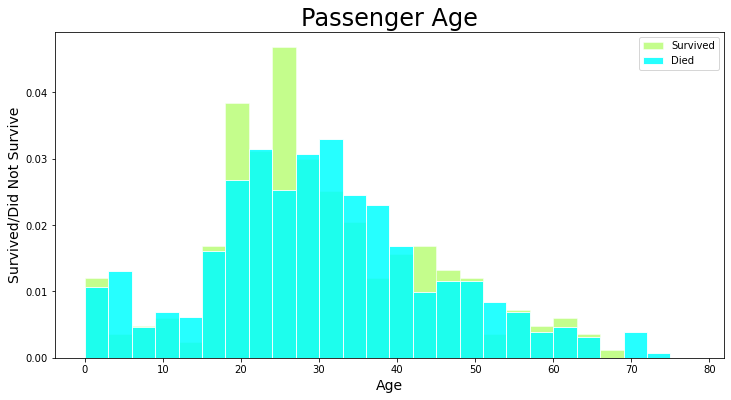

In [13]:
fig, ax = plt.subplots(figsize=(12,6))

# histogram data
dfCTitanic.loc[dfCTitanic["Survived"] == 1].hist(column ="Age", density = True, ax=ax, facecolor="lawngreen", alpha = 0.45, edgecolor="white",bins=range(0,81,3))


# titles and labels
ax.set_xlabel("Age", fontsize=14)
ax.set_ylabel("Survived/Did Not Survive", fontsize=14)
ax.set_title("Passenger Age", fontsize=24)

ax.grid(alpha=0.5)
ax.set_axisbelow(True)

# histogram data
dfCTitanic.loc[dfCTitanic["Survived"] == 0].hist(column ="Age", density = True, ax=ax, facecolor="aqua", alpha = 0.85, edgecolor="white",bins=range(0,81,3))


# titles and labels
ax.set_xlabel("Age", fontsize=14)
ax.set_ylabel("Survived/Did Not Survive", fontsize=14)
ax.set_title("Passenger Age", fontsize=24)


plt.legend(('Survived','Died'), loc = 'upper right')
ax.grid(alpha=0.85)
ax.set_axisbelow(True)

# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

# # --------------------------------------
# # Plot histogram for Niwot on Top 
# # --------------------------------------
# dfCTitanic.loc[(dfCTitanic["Survived"]==1),"Age"].hist(column="Age", density = True, ax=axes[0], facecolor="lawngreen", edgecolor="white",bins=range(0,81,3))
                                                      
# # Add titles and labels 
# axes[0].set_title("Gross Res Min Daily Temperatures", fontsize=20)
# axes[0].set_xlabel("Min Temperature [degrees F]", fontsize=16)
# axes[0].set_ylabel("Density", fontsize=16)

# # Make grid lighter and set behind data
# axes[0].grid(alpha=0.25)
# axes[0].set_axisbelow(True)

**Comments**: 

Comment on the results. Does your figure suggest that some age ranges 
are more or less likely to have survived the disaster than other ages? 
Fully explain your reasoning and use your figure to justify your conclusions.

a. Based on what I can see, those who were on the younger side of 30 and older than 18-20 managed to have a better chance at surviving. This can be attributed to healthier, stronger, and preservation of younger life versus those who were older and died because of their age, physical shape, or relinquish their spot in favor of others. Children under the age of 10 also showed decent survivability compared to other age ranges as many probably gave up their young to someone on a lifeboat, but that sample size is smaller due to less babies and toddlers being on board to begin with. 

If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

a. Generally preservation of younger healthier individuals in their prime would affect likelyhood of survival. Those who could be carried such as babies or toddlers could also be handed over and taken on a boat with little resistance. Priotizing those in certain parts of their lives as a group effort would help your survival chances. 

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

Frequency is problematic because it can misrespresent its findings on scale or start/end points on the x/y alone. When a density histogram derives the data down to a factor of 1, we can more accuratly portray the data and give a better representation of what is going on not influenced by how the histogram itself is set up. 

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

The data definetly shows some form of class warfare, male chivalry, and age bias when people effectively prioritized certain people over others. We witnessed that those who were female were prioritized the most out of gender, with even class 3 women having a higher survival rate then even class 1 men. We also saw that those in class 1 and 2 had higher survival rates then those in class 3, representing a large majority of those who survived in general. This is most likely due to the percieved importance those people may have had over others as well, whereas class 3 passengers were more or less cargo to begin with. Finally, passangers were definitly prioritized based on age, as those who could literally live more life were prioritized over those who were already past their primes. We can see that a group effort was made to essentialy get what society deemed the most important demographic makeup passengers off before anyone else. 

**Part H**: In lecture we described some types of sampling from a *sample frame*.  Suppose we considered the passenger log the sample frame, and decided to generate smaller samples to work with for computing means and propotions.  Perform the following operations:

1) Since the overall ship had around 65% men, create a *sample* (see `df.sample`) of distinct passengers from the overall ship that consists of exactly 13 randomly chosen men and 7 randomly chosen women.  Report the proportion of those passengers that survived.

2) Repeat the sampling process from part 1) 1000 times.  Report the **mean** survival proportion of those 1000 samples.  Is this close to the survival rate in part A?  Why or why not?

3) What was the name for this kind of sampling?



In [14]:
#1. 
    
ran_m = dfCTitanic[dfCTitanic["Sex"] == "male"].sample(13)

ran_w = dfCTitanic[dfCTitanic["Sex"] == "female"].sample(7)
    
    # Combine samples

comb = pd.concat([ran_m, ran_w])
    
    # Discover number of passengers who survived

output = (comb.loc[:,"Survived"] == 1).sum()
    
    # Return the mean

print("Surviving passanger rate:", output/20)



Surviving passanger rate: 0.45


In [15]:
#2 

def randpass():
    
    ran_m = dfCTitanic[dfCTitanic["Sex"] == "male"].sample(13)

    ran_w = dfCTitanic[dfCTitanic["Sex"] == "female"].sample(7)
    
    # Combine samples

    comb = pd.concat([ran_m, ran_w])
    
    # Discover number of passengers who survived

    output = (comb.loc[:,"Survived"] == 1).sum()
    
    # Return the mean

    return output/20 

# awful time crunched implementation to rerun randpass 1000 times don't judge me
# it's 11:35

def thousrand():
    total = 0
    for x in range(1000):
        total = total + randpass()
    return total

mean = thousrand()

print("Survial Rate out of 1000,", mean/1000)
    
    

Survial Rate out of 1000, 0.38890000000000063


2) Repeat the sampling process from part 1) 1000 times.  Report the **mean** survival proportion of those 1000 samples.  Is this close to the survival rate in part A?  Why or why not?

a. The survival rate is very similar to what was calculated before (sr = 0.393). This is most likely due to random sampling of a data set evenutally representing the data set if enough random samples are taken over time, in a way increasing accuracy of calculated survival rate for every new mean. 



3) What was the name for this kind of sampling?

a. This kind of sampling is stratified simple.

